In [17]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# csv집어 넣는 폴더 하나로 통일시켜서 이름좀 같게 만들자

In [18]:
df = pd.read_csv('../데이터자료/label지정.csv', encoding='CP949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10662 entries, 0 to 10661
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   회사명               10662 non-null  object 
 1   거래소코드             10662 non-null  int64  
 2   회계년도              10662 non-null  object 
 3   상장일               10662 non-null  object 
 4   상장폐지일             708 non-null    object 
 5   산업명               10662 non-null  object 
 6   소속코드              10662 non-null  int64  
 7   [제조]매출액증가율        10662 non-null  float64
 8   [제조]유형자산증가율       10662 non-null  float64
 9   [제조]비유동자산증가율      10662 non-null  float64
 10  [제조]총자본증가율        10662 non-null  float64
 11  [제조]자기자본증가율       10662 non-null  float64
 12  [제조]유동자산증가율       10662 non-null  float64
 13  [제조]순이익증가율        10662 non-null  float64
 14  [제조]재고자산증가율       10662 non-null  float64
 15  [제조]매출액총이익률       10662 non-null  float64
 16  [제조]매출액순이익률       10662 non-null  float6

### 윈저라이징

In [19]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)
df_1

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]총자본투자효율,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),label
0,56.40,-5.90,-12.89,1.98,-2.02,17.64,-78.28,-1.43,41.83,-8.50,...,12.72,35.86,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,0
1,-8.43,-4.12,-16.43,109.15,75.17,207.08,341.57,7.73,28.34,-40.97,...,0.47,2.89,10.67,1.66,810.10,-710.10,-1161.00,1.71,-7.75,0
2,25.51,16.09,77.05,-2.09,55.10,-18.89,0.00,56.29,38.70,1.45,...,12.51,77.91,289.40,34.29,71.28,28.72,4.23,2.03,0.70,0
3,11.52,74.30,68.15,3.86,0.01,-25.93,-46.64,6.37,37.07,0.69,...,12.16,37.80,132.06,31.04,79.30,20.70,2.24,1.54,3.60,0
4,18.85,-5.37,1.66,-2.64,-4.48,-7.17,0.00,11.04,36.26,-13.50,...,7.63,24.21,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10657,-7.26,-5.61,0.11,1.39,1.39,7.35,-25.71,52.46,5.33,1.51,...,8.84,18.38,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,0
10658,8.12,-0.56,-0.48,0.98,0.83,7.34,-5.19,9.41,5.07,1.33,...,8.54,18.04,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,0
10659,6.87,-0.36,-2.09,-5.89,0.99,-21.19,14.78,-46.09,5.00,1.43,...,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,0
10660,-9.35,-7.00,-2.63,11.24,9.31,80.74,249.94,96.40,5.14,5.50,...,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,0


In [20]:
df_1 = df_1.drop(['[제조]순운전자본비율',"[제조]유동자산구성비율","[제조]자기자본구성비율"],axis=1)

# MDA

## Bartlett 검정

In [21]:
close = df[df['label']== 1] #Existing Customer
normal = df[df['label']== 0] #Attrited Customer

### F-test 검정

In [25]:
a = []
for i in df_1:
    # print(i)
    # lresult = stats.levene(close[i], normal[i])
    lresult = stats.bartlett(close[i], normal[i])
    
    # print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

    # result = stats.ttest_ind(close[i], normal[i], equal_var=False) #등분산
    # print('t statistic : %.3f \np-value : %.3f' % (result))
    # a.append([i,lresult[-1],result[-1]])
    a.append([i,lresult[-1]])

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2467: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [26]:
a= pd.DataFrame(a)
a.columns=["피처값",'F-test']
a


,피처값,F-test
0,[제조]매출액증가율,4.354479e-183
1,[제조]유형자산증가율,3.086256e-143
2,[제조]비유동자산증가율,1.175516e-29
3,[제조]총자본증가율,4.028963e-03
4,[제조]자기자본증가율,2.157751e-01
5,[제조]유동자산증가율,7.498539e-06
6,[제조]순이익증가율,0.000000e+00
7,[제조]재고자산증가율,2.030280e-251
8,[제조]매출액총이익률,9.314729e-54
9,[제조]매출액순이익률,3.757443e-22


### 등분산과 이분산 구분

In [27]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
    else:
        a.loc[i,"분산"] = "hetero"
a

,피처값,F-test,분산,T-test
0,[제조]매출액증가율,4.354479e-183,hetero,
1,[제조]유형자산증가율,3.086256e-143,hetero,
2,[제조]비유동자산증가율,1.175516e-29,hetero,
3,[제조]총자본증가율,4.028963e-03,hetero,
4,[제조]자기자본증가율,2.157751e-01,homo,
5,[제조]유동자산증가율,7.498539e-06,hetero,
6,[제조]순이익증가율,0.000000e+00,hetero,
7,[제조]재고자산증가율,2.030280e-251,hetero,
8,[제조]매출액총이익률,9.314729e-54,hetero,
9,[제조]매출액순이익률,3.757443e-22,hetero,


### 등분산 이분산 T-test
- 등분산일시 T-test
- 이분산일시 Welch T-test

In [28]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(close[a.loc[i,"피처값"]], normal[a.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        a.loc[i,"T-test"] = result[-1]
    else:
        a.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(close[a.loc[i,"피처값"]], normal[a.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        a.loc[i,"T-test"] = result[-1]
a


,피처값,F-test,분산,T-test
0,[제조]매출액증가율,4.354479e-183,hetero,0.026467
1,[제조]유형자산증가율,3.086256e-143,hetero,0.095489
2,[제조]비유동자산증가율,1.175516e-29,hetero,0.0
3,[제조]총자본증가율,4.028963e-03,hetero,0.0
4,[제조]자기자본증가율,2.157751e-01,homo,0.199841
5,[제조]유동자산증가율,7.498539e-06,hetero,0.0
6,[제조]순이익증가율,0.000000e+00,hetero,0.316781
7,[제조]재고자산증가율,2.030280e-251,hetero,0.001379
8,[제조]매출액총이익률,9.314729e-54,hetero,0.000001
9,[제조]매출액순이익률,3.757443e-22,hetero,0.0


In [29]:
# bartlett2 =a[a["T-test"]>=0.05]
bartlett2 = a[a["분산"]=="homo"]
bartlett2 = pd.DataFrame(bartlett2)
# bartlett2=bartlett2.sort_values(['T-test'],ascending=True)
# bartlett2 = bartlett2.loc[[1,2,3,5,7,10,11,14,15,21,26,30,33,35,37]]
bartlett2= bartlett2.sort_values(["T-test"], ascending=True)

bartlett2 = bartlett2.reset_index()
bartlett2
# bartlett2 =pd.DataFrame(bartlett2)

,index,피처값,F-test,분산,T-test
0,35,[제조]부가가치,0.556112,homo,0.0
1,28,[제조]당좌자산회전률,0.897931,homo,0.000069
2,27,[제조]유동자산회전률,0.068816,homo,0.00022
3,4,[제조]자기자본증가율,0.215775,homo,0.199841
4,19,[제조]매출채권회전률,0.126657,homo,0.288702


In [ ]:
# a= bartlett2.loc[[0,1,3,4,5,6,7,9,10]]
# a


In [ ]:
a= bartlett2.loc[[0,1,2,3,4,5,6,7,8]]
a= a.drop(["index"],axis=1)
a = a.set_index(a["피처값"])
a.index

Index(['[제조]총자본증가율', '[제조]설비투자효율', '[제조]총자본회전률', '[제조]비유동자산증가율', '[제조]당좌자산회전률',
       '[제조]유동자산회전률', '[제조]유동자산구성비율', '[제조]순이익증가율', '[제조]유형자산회전율'],
      dtype='object', name='피처값')

In [ ]:
# ndex(['[제조]1주당순이익', '[제조]총자본증가율', '[제조]순운전자본회전률', '[제조]비유동자산증가율',
#        '[제조]설비투자효율', '[제조]총자본회전률', '[제조]유동자산구성비율', '[제조]당좌자산회전률',
#        '[제조]유동자산회전률', '[제조]유형자산회전율', '[제조]재고자산회전률'],
#       dtype='object', name='피처값')
feature= df[[ '[제조]총자본증가율', '[제조]설비투자효율', '[제조]총자본회전률', '[제조]비유동자산증가율', '[제조]당좌자산회전률',
       '[제조]유동자산회전률', '[제조]유동자산구성비율', '[제조]순이익증가율', '[제조]유형자산회전율']]


In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)
# vif 와 비교하여서 변수 제거 

,VIF Factor,features
0,24.805766,[제조]유동자산회전률
1,18.213223,[제조]당좌자산회전률
2,14.130278,[제조]총자본회전률
3,4.336074,[제조]유동자산구성비율
4,2.217184,[제조]유형자산회전율
5,1.983425,[제조]설비투자효율
6,1.863457,[제조]총자본증가율
7,1.732683,[제조]비유동자산증가율
8,1.025995,[제조]순이익증가율


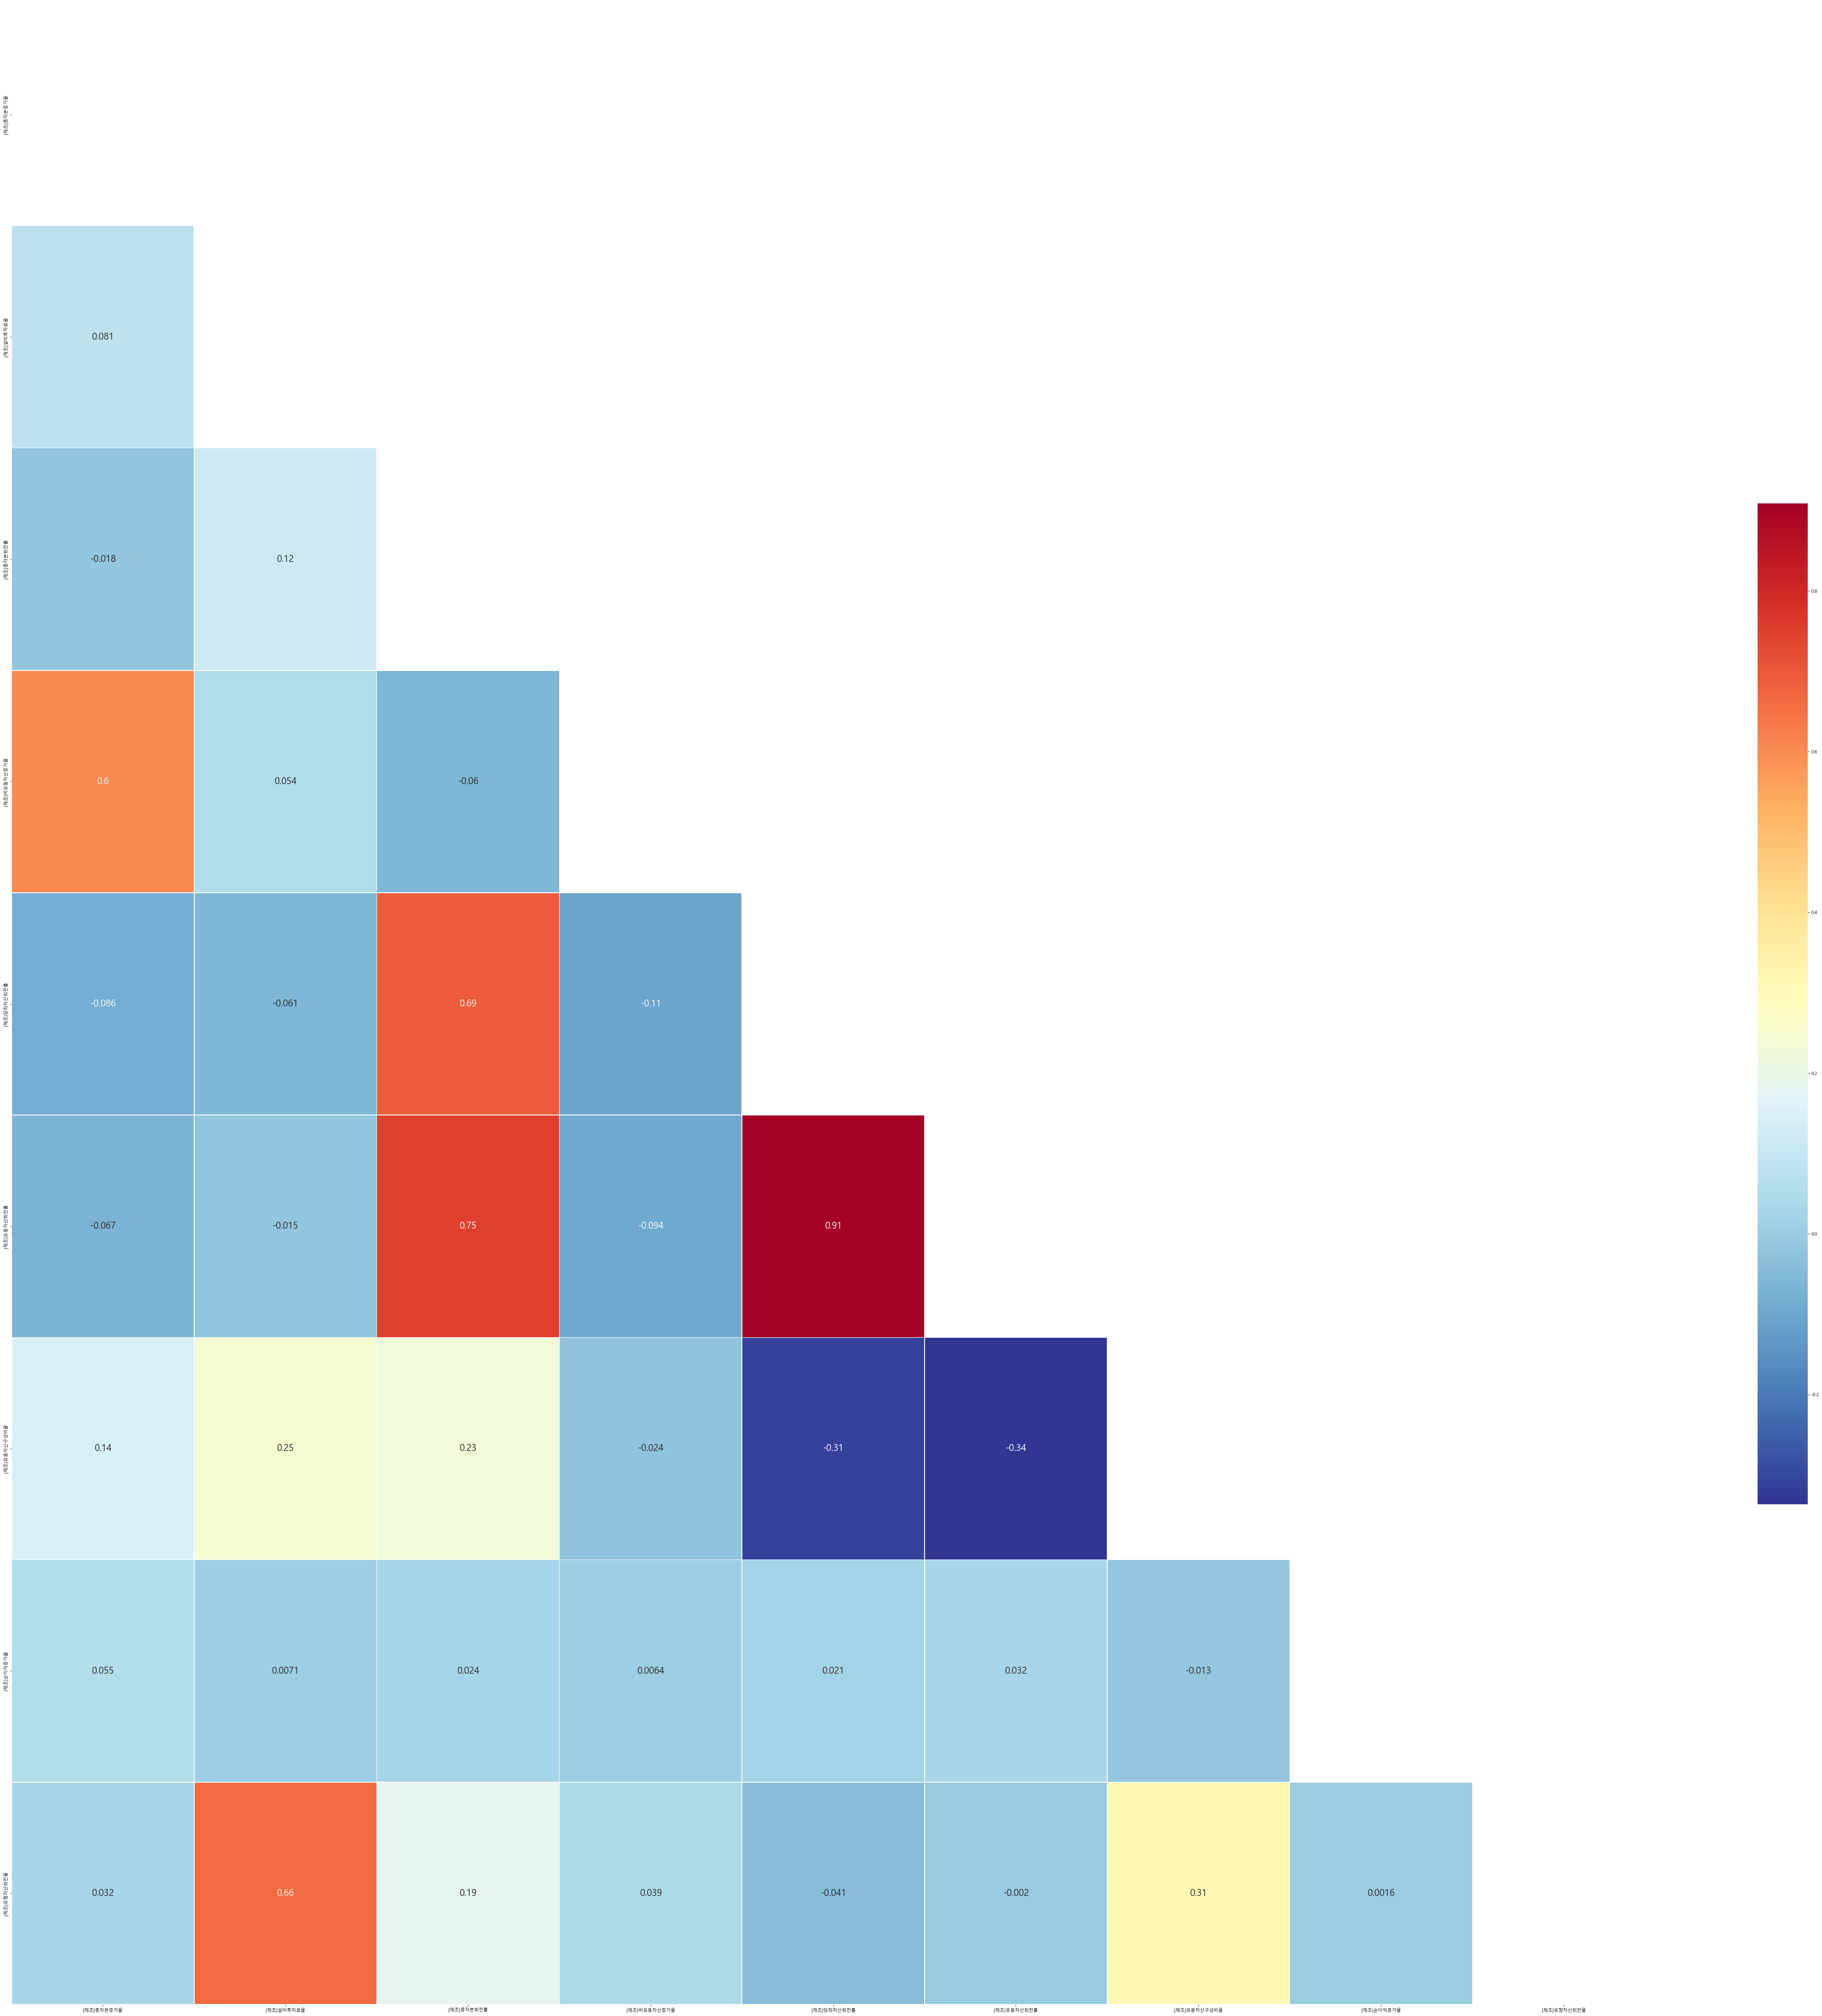

In [ ]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(feature)

### T-test 결과값이 0.05이하인 유의미한 피처 선정

In [30]:
bartlett =a[a["T-test"]<=0.05]
bartlett = bartlett[bartlett["분산"]=="hetero"]
bartlett = pd.DataFrame(bartlett)
# bartlett=bartlett.sort_values(['T-test'],ascending=True)
# bartlett = bartlett.loc[[1,2,3,5,7,10,11,14,15,21,26,30,33,35,37]]
bartlett= bartlett.sort_values(["T-test"], ascending=True)

bartlett = bartlett.reset_index()
bartlett
# bartlett =pd.DataFrame(bartlett)

,index,피처값,F-test,분산,T-test
0,45,label,NaN,hetero,0.0
1,26,[제조]순운전자본회전률,2.989251e-05,hetero,0.0
2,11,[제조]총자본순이익률,6.984573e-176,hetero,0.0
3,10,[제조]총자본사업이익률,2.880360e-68,hetero,0.0
4,14,[제조]1주당매출액,2.418666e-73,hetero,0.0
5,3,[제조]총자본증가율,4.028963e-03,hetero,0.0
6,29,[제조]유동비율,5.606841e-41,hetero,0.0
7,17,[제조]비유동자산회전률,1.617149e-36,hetero,0.0
8,30,[제조]당좌비율,1.414569e-42,hetero,0.0
9,15,[제조]총자본회전률,8.605920e-03,hetero,0.0


In [43]:
a= bartlett.loc[[1,2,4,5,6,7,9]]
a= a.drop(["index"],axis=1)
a

,피처값,F-test,분산,T-test
1,[제조]순운전자본회전률,2.989251e-05,hetero,0.0
2,[제조]총자본순이익률,6.984573e-176,hetero,0.0
4,[제조]1주당매출액,2.418666e-73,hetero,0.0
5,[제조]총자본증가율,4.028963e-03,hetero,0.0
6,[제조]유동비율,5.606841e-41,hetero,0.0
7,[제조]비유동자산회전률,1.617149e-36,hetero,0.0
9,[제조]총자본회전률,8.605920e-03,hetero,0.0


In [44]:

feature= df[[ '[제조]순운전자본회전률', '[제조]총자본순이익률', "[제조]1주당매출액","[제조]부가가치율",
             '[제조]총자본증가율','[제조]비유동자산회전률',"[제조]유동비율"]]


In [45]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)
# vif 와 비교하여서 변수 제거 

,VIF Factor,features
0,1.742897,[제조]순운전자본회전률
1,1.565738,[제조]비유동자산회전률
2,1.151624,[제조]유동비율
3,1.111793,[제조]1주당매출액
4,1.103135,[제조]총자본증가율
5,1.099089,[제조]총자본순이익률
6,1.093016,[제조]부가가치율


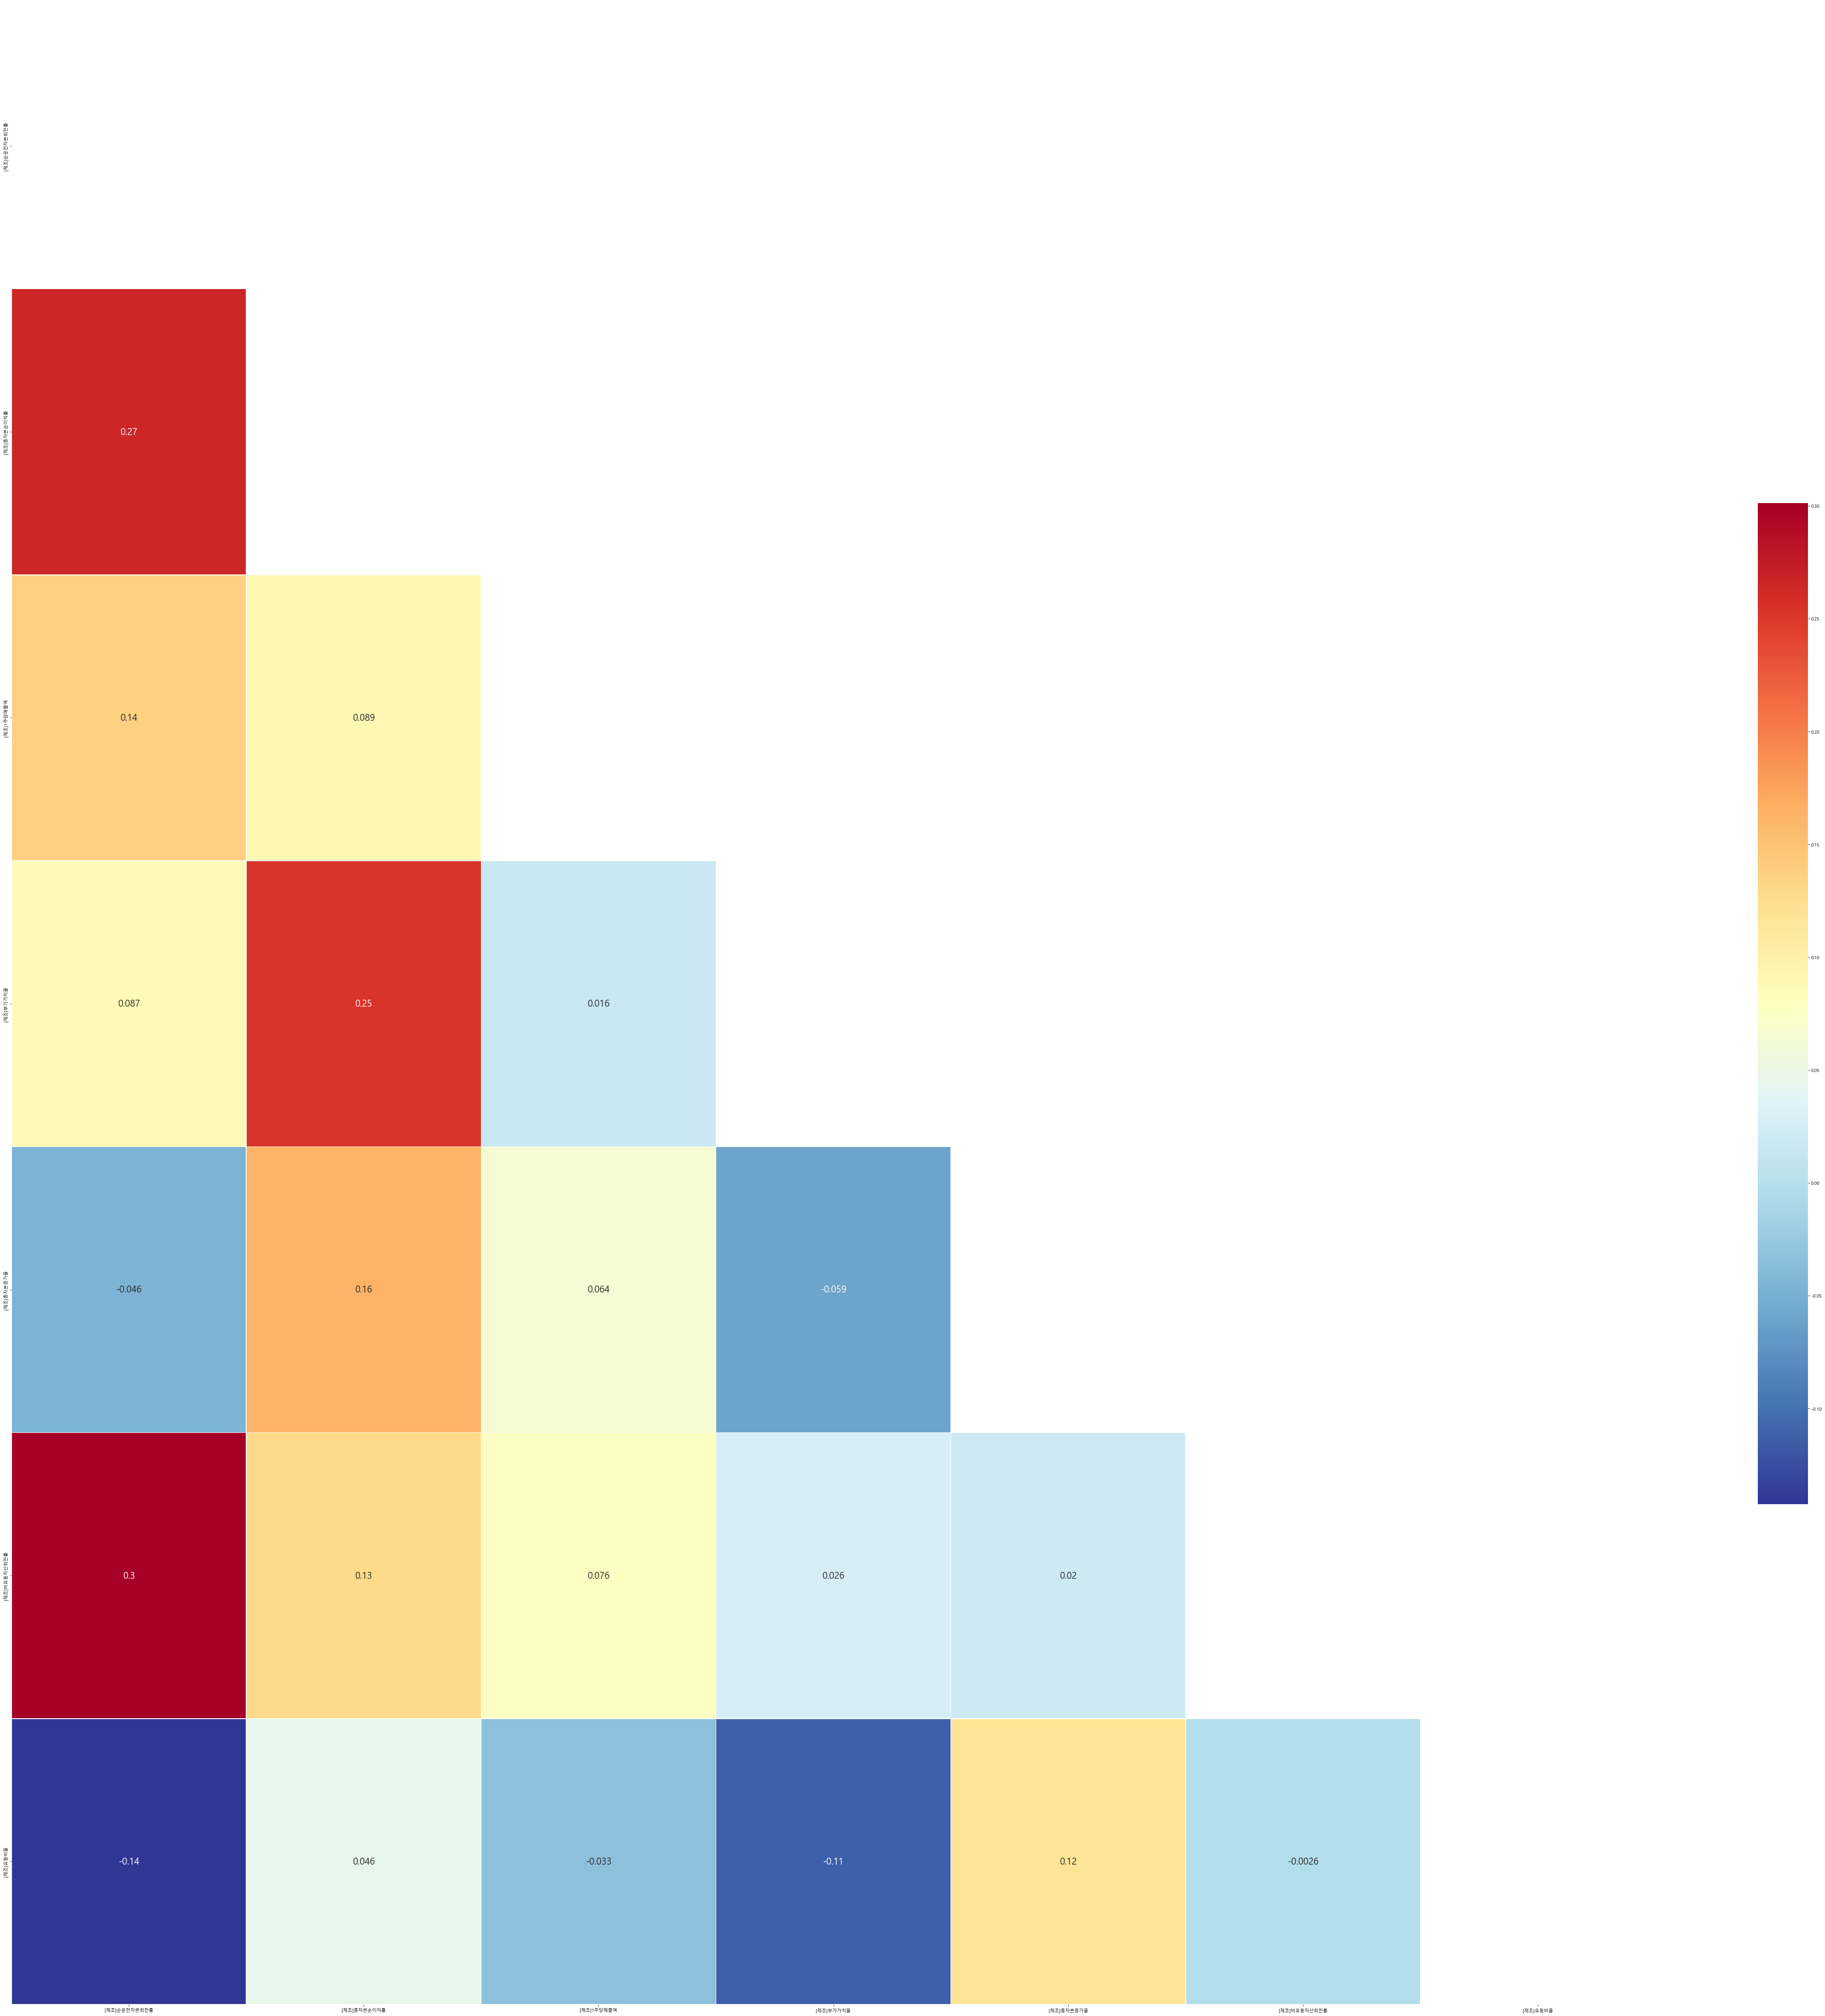

In [46]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(feature)

### 피처별 범주 분류

In [ ]:
bartlett['범주']=''

In [ ]:
bartlett['범주'][[38,39,40,41,42,44,45]] = '생산성'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27280\3652136885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bartlett['범주'][[38,39,40,41,42,44,45]] = '생산성'


KeyError: '[38 39 40 41 42 44 45] not in index'

In [ ]:
bartlett = bartlett.drop(48)
bartlett

,피처값,F-test,분산,T-test,범주
0,[제조]매출액증가율,8.096743e-08,hetero,0.000452,성장성
2,[제조]비유동자산증가율,3.487216e-01,homo,0.0,성장성
3,[제조]총자본증가율,1.864021e-01,homo,0.0,성장성
4,[제조]자기자본증가율,1.071900e-14,hetero,0.000008,성장성
5,[제조]유동자산증가율,1.701051e-04,hetero,0.000015,성장성
7,[제조]재고자산증가율,1.335022e-05,hetero,0.0,성장성
8,[제조]매출액총이익률,1.261631e-04,hetero,0.0,수익성
9,[제조]매출액순이익률,1.070479e-80,hetero,0.0,수익성
10,[제조]총자본사업이익률,5.545513e-18,hetero,0.0,수익성
11,[제조]총자본순이익률,4.036610e-45,hetero,0.0,수익성


In [ ]:
Grow_bartlett = bartlett[bartlett['범주']=='성장성']
Profit_bartlett = bartlett[bartlett['범주']=='수익성']
Activity_bartlett = bartlett[bartlett['범주']=='활동성']
Stability_bartlett = bartlett[bartlett['범주']=='안정성']
Productivity_bartlett = bartlett[bartlett['범주']=='생산성']

### 범주별 피처

In [ ]:
Grow_bartlett

,피처값,F-test,분산,T-test,범주
0,[제조]매출액증가율,8.096743e-08,hetero,0.000452,성장성
2,[제조]비유동자산증가율,3.487216e-01,homo,0.0,성장성
3,[제조]총자본증가율,1.864021e-01,homo,0.0,성장성
4,[제조]자기자본증가율,1.071900e-14,hetero,0.000008,성장성
5,[제조]유동자산증가율,1.701051e-04,hetero,0.000015,성장성
7,[제조]재고자산증가율,1.335022e-05,hetero,0.0,성장성


In [ ]:
Profit_bartlett

,피처값,F-test,분산,T-test,범주
8,[제조]매출액총이익률,1.261631e-04,hetero,0.0,수익성
9,[제조]매출액순이익률,1.070479e-80,hetero,0.0,수익성
10,[제조]총자본사업이익률,5.545513e-18,hetero,0.0,수익성
11,[제조]총자본순이익률,4.036610e-45,hetero,0.0,수익성
12,[제조]자기자본순이익률,1.878436e-87,hetero,0.0,수익성
13,[제조]1주당순이익,6.309810e-02,homo,0.0,수익성
14,[제조]1주당매출액,5.874191e-12,hetero,0.0,수익성


In [ ]:
Activity_bartlett

,피처값,F-test,분산,T-test,범주
15,[제조]총자본회전률,1.382090e-01,homo,0.0,활동성
17,[제조]비유동자산회전률,2.322028e-07,hetero,0.0,활동성
20,[제조]매입채무회전률,6.612722e-94,hetero,0.0,활동성
21,[제조]매입채무회전기간,6.893020e-27,hetero,0.0,활동성
23,[제조]매출채권회전기간,1.320025e-21,hetero,0.000327,활동성
26,[제조]순운전자본회전률,6.821750e-02,homo,0.0,활동성
27,[제조]유동자산회전률,9.444850e-01,homo,0.00154,활동성
28,[제조]당좌자산회전률,2.660212e-01,homo,0.001091,활동성


In [ ]:
Stability_bartlett

,피처값,F-test,분산,T-test,범주
29,[제조]유동비율,4.549235e-09,hetero,0.0,안정성
30,[제조]당좌비율,1.398865e-08,hetero,0.0,안정성
31,[제조]현금비율,7.499112e-08,hetero,0.0,안정성
32,[제조]부채비율,1.765822e-97,hetero,0.0,안정성
33,[제조]순운전자본비율,1.733802e-03,hetero,0.0,안정성
34,[제조]자기자본배율,6.538218e-33,hetero,0.0,안정성
35,[제조]비유동비율,1.125987e-72,hetero,0.0,안정성
36,[제조]유동자산구성비율,1.227852e-01,homo,0.000042,안정성
37,[제조]자기자본구성비율,1.399577e-05,hetero,0.0,안정성
47,[제조]이자보상배율(이자비용),8.892149e-22,hetero,0.000614,안정성


In [ ]:
Productivity_bartlett

,피처값,F-test,분산,T-test,범주
38,[제조]부가가치,7.452751e-04,hetero,0.0,생산성
39,[제조]총자본투자효율,6.512239e-40,hetero,0.0,생산성
40,[제조]설비투자효율,1.340890e-01,homo,0.0,생산성
41,[제조]기계투자효율,2.207324e-156,hetero,0.0,생산성
42,[제조]부가가치율,1.246357e-87,hetero,0.0,생산성
44,[제조]자본분배율,9.919202e-16,hetero,0.00034,생산성
45,[제조]이윤분배율,1.149550e-18,hetero,0.00307,생산성
